In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import ssl
import certifi

In [55]:
#try:
#    _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#    pass
##else:
 #   ssl._create_default_https_context = _create_unverified_https_context##

#nltk.download('punkt', ssl_context=ssl.create_default_context(cafile=certifi.where()))
#nltk.download('stopwords', ssl_context=ssl.create_default_context(cafile=certifi.where()))

In [56]:
nltk.download('punkt', download_dir='/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data')
nltk.download('stopwords', download_dir='/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brianpak/Desktop/ham_detector/env/lib/nltk_data
[nltk_data]     ...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianpak/Desktop/ham_detector/env/lib/nltk_data
[nltk_data]     ...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [57]:
df = pd.read_csv('./data/spam.csv', encoding='ISO-8859-1')

In [58]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [59]:
df = df[['v1','v2']]

In [60]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
print(df.describe())
print(df.info())
print(df.isnull().sum())

          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
v1    0
v2    0
dtype: int64


In [62]:
df['text_length'] = df['v2'].apply(len)

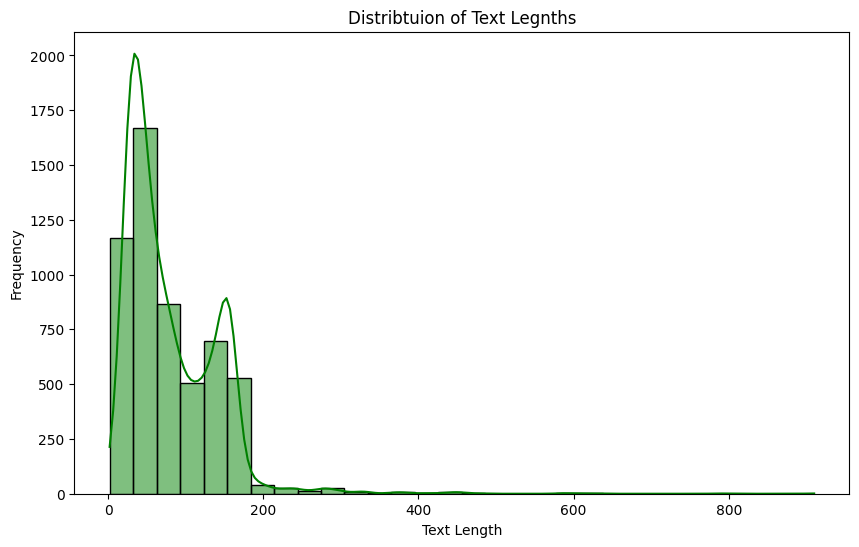

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color = 'green')
plt.title('Distribtuion of Text Legnths')
plt.xlabel('Distributino of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [64]:
stop_words = set(stopwords.words('english'))

In [65]:
#may need to convert to utf-8?
#df['v2'] = df['v2'].apply(lambda x: x.encode('ISO-8859-1').decode('utf-8') if isinstance(x, str) else '')


In [66]:
# Check for any remaining problematic characters
problematic_rows = df[df['v2'].apply(lambda x: any(ord(char) > 128 for char in x))]
print(problematic_rows) 

        v1                                                 v2  text_length
5     spam  FreeMsg Hey there darling it's been 3 week's n...          148
8     spam  WINNER!! As a valued network customer you have...          158
12    spam  URGENT! You have won a 1 week FREE membership ...          156
18     ham  Fine if thatåÕs the way u feel. ThatåÕs the wa...           58
19    spam  England v Macedonia - dont miss the goals/team...          156
...    ...                                                ...          ...
5511   ham            ItÛ÷s reassuring, in this crazy world.           39
5524  spam  You are awarded a SiPix Digital Camera! call 0...          153
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...          160
5567  spam  This is the 2nd time we have tried 2 contact u...          161
5568   ham              Will Ì_ b going to esplanade fr home?           37

[481 rows x 3 columns]


In [67]:
df['tokenized_text'] = df['v2'].apply(lambda x: x.lower().split() if isinstance(x, str) else [])


In [68]:
df['tokenized_text'] = df['v2'].apply(lambda x: 
                                      [word for word in x.lower().split() if word not in stop_words] 
                                      if isinstance(x, str) else [])


In [69]:
df

,v1,v2,text_length,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point,, crazy.., available, bugis..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar..., joking, wif, u, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor..., u, c, already, sa..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, think, goes, usf,, lives, around, though]"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,"[2nd, time, tried, 2, contact, u., u, å£750, p..."
5568,ham,Will Ì_ b going to esplanade fr home?,37,"[ì_, b, going, esplanade, fr, home?]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[pity,, *, mood, that., so...any, suggestions?]"
5570,ham,The guy did some bitching but I acted like i'd...,125,"[guy, bitching, acted, like, i'd, interested, ..."


In [70]:
all_words = [word for tokens in df['tokenized_text'] for word in tokens]

In [71]:
word_freq = Counter(all_words)

In [72]:
print(word_freq.most_common(10))

[('u', 991), ('call', 557), ('2', 453), ('ur', 379), ("i'm", 377), ('get', 375), ('&lt;#&gt;', 276), ('go', 262), ('4', 249), ('.', 235)]


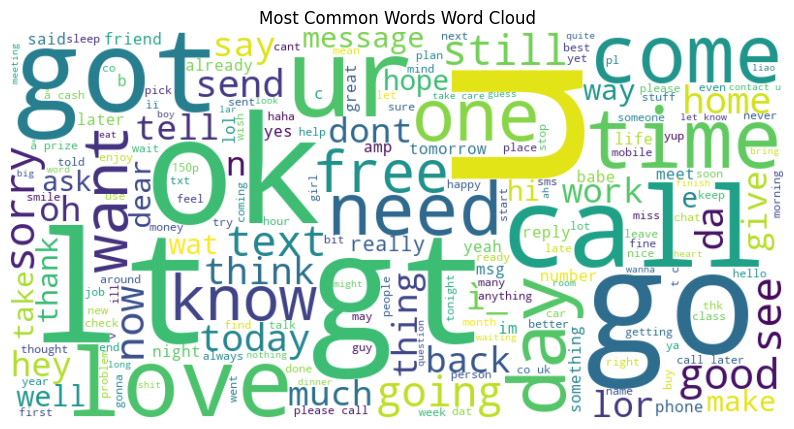

In [73]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words Word Cloud')
plt.show()

In [74]:
def get_ngrams(text, n=2):
    # Ensure the input is a string
    if not isinstance(text, str):
        return []
    # Tokenize and create n-grams
    tokens = word_tokenize(text.lower())  # This is where 'punkt' is needed
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams if all(word.isalpha() for word in grams)]

In [75]:
#nltk.data.path.append('/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data')

In [1]:
#print(nltk.data.path)

In [77]:
df['bigrams'] = df['v2'].apply(lambda x: get_ngrams(x, n=2))
all_bigrams = [bigram for bigrams in df['bigrams'] for bigram in bigrams]
bigram_freq = Counter(all_bigrams)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/brianpak/nltk_data'
    - '/Users/brianpak/Desktop/ham_detector/env/nltk_data'
    - '/Users/brianpak/Desktop/ham_detector/env/share/nltk_data'
    - '/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/brianpak/Desktop/ham_detector/env/nltk_data'
    - '/Users/brianpak/Desktop/ham_detector/env/share/nltk_data'
    - '/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data'
    - '/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data'
**********************************************************************
